## Loading Modules

In [2]:
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import probplot

%matplotlib inline
%pylab inline


Populating the interactive namespace from numpy and matplotlib


## Initial Parameters

In [3]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

## Loading the Data
***
The data was acquired from a Kaggle's Competition called [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration).

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
df.shape

(1458644, 11)

In [7]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


The data consists of a large number of rows with the file memory being 122.4+ MB. To make the file lighter lets convert category column 'store_and_fwd_flag' to category data type and see how much memory can be saved. As well, we will convert pickup and dropoff datetime columns to  datetime objects. Also, converting all integers to floats will make data easier to work with.

In [9]:
# Prepare a format string: time_format
time_format = '%Y-%m-%d %H:%M:%S'

# Convert to datetime object
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format=time_format) 
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], format=time_format)

df['trip_duration'] = df['trip_duration'].astype(float)
df['vendor_id'] = df['vendor_id'].astype(float)
df['passenger_count'] = df['passenger_count'].astype(float)

df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null float64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null float64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null category
trip_duration         1458644 non-null float64
dtypes: category(1), datetime64[ns](2), float64(7), object(1)
memory usage: 112.7+ MB


Saved almost 10 MB of memory.

## Summary Statistics
***
Let's get a basic summary statistics for each of the columns.

In [10]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


The max value of trip duration seems unrealistic for a taxi trip duration causing our standard deviation to be very high. We will analyze more in detail the data but first let's find out the percetange of missing data for each column.

In [11]:
frac_nulls = {col: (sum(df[col].isnull())/len(df)) for col in df.columns}
frac_nulls = sorted(frac_nulls.items(), key = operator.itemgetter(1))
frac_nulls

[('id', 0.0),
 ('vendor_id', 0.0),
 ('pickup_datetime', 0.0),
 ('dropoff_datetime', 0.0),
 ('passenger_count', 0.0),
 ('pickup_longitude', 0.0),
 ('pickup_latitude', 0.0),
 ('dropoff_longitude', 0.0),
 ('dropoff_latitude', 0.0),
 ('store_and_fwd_flag', 0.0),
 ('trip_duration', 0.0)]

The train data shows that all of the columns are complete. Let's explore more the data and see if there are errors in the data. To narrow down what might be errors in the data, let's create a column for the total trip duration in hours to decrease the scale of the output variable column. As well it will be important to have an idea of the total distance traveled by the taxi and compare them both since longitude and latitude by themselves are not really helpful. So let's add two columns named 'total_distance' and 'trip_duration_hours'.

In [12]:
# https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
# this calculates the distance in a straight line. Need to look into a way to be more accurate
from math import sin, cos, sqrt, atan2, radians

def calculate_traveled_distance(lat11,lon11,lat21,lon21):
    # approximate radius of earth in km
    R = 6373.0
    
    lat1 = radians(lat11)
    lon1 = radians(lon11)
    
    lat2 = radians(lat21)
    lon2 = radians(lon21)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    #to retrieve distance in miles
    distance = R * c * 0.621371
    
    return distance

In [13]:
columns = ['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']
df1 = pd.DataFrame(df, columns=columns)
df['total_distance'] = df1.apply((lambda s: calculate_traveled_distance(s[0],s[1],s[2],s[3])),axis=1)
df['trip_duration_hours'] = df['trip_duration'] / 3600

In [14]:
df[['total_distance','trip_duration_hours']].describe()

,total_distance,trip_duration_hours
count,1.458644e+06,1.458644e+06
mean,2.138724e+00,2.665256e-01
std,2.670582e+00,1.454842e+00
min,0.000000e+00,2.777778e-04
25%,7.656678e-01,1.102778e-01
50%,1.301384e+00,1.838889e-01
75%,2.408778e+00,2.986111e-01
max,7.713067e+02,9.795228e+02


The statistics summary shows that the maximum distance of a trip was 700+ miles which is really questionable. Let's first add the trip duration in hours and then plot duration vs distance. As well, the trip duration in hours seems to be almost 1000 hours. Let's create a table of how the trip_duration_huors is distributed.

In [15]:
ranges = np.linspace(0,1000,1001)
s = df.groupby(pd.cut(df['trip_duration_hours'], ranges))['trip_duration_hours'].count()

print('{:<28} {:<10}'.format('Duration Interval(Hours)','Frequency'))
for k, v in s.iteritems():
    if v != 0:
        print('{:<28} {:10}'.format(str(k),str(v)))

Duration Interval(Hours)     Frequency 
(0.0, 1.0]                   1446327   
(1.0, 2.0]                   10064     
(2.0, 3.0]                   141       
(3.0, 4.0]                   35        
(4.0, 5.0]                   5         
(5.0, 6.0]                   11        
(6.0, 7.0]                   11        
(7.0, 8.0]                   13        
(8.0, 9.0]                   17        
(9.0, 10.0]                  8         
(10.0, 11.0]                 13        
(11.0, 12.0]                 6         
(12.0, 13.0]                 8         
(13.0, 14.0]                 5         
(14.0, 15.0]                 7         
(15.0, 16.0]                 5         
(16.0, 17.0]                 10        
(17.0, 18.0]                 10        
(18.0, 19.0]                 10        
(19.0, 20.0]                 5         
(20.0, 21.0]                 10        
(21.0, 22.0]                 17        
(22.0, 23.0]                 63        
(23.0, 24.0]                 1839      


More than 95 percent of the trips in the data are below one hour which is a good sign. However, the data shows some unsual activity which will be explored more in depth before making any conclusion.

## EDA
***

Let's look at some plots from the data and analyze the output variable *trip_duration* column. In this case, the duration will be used in hours for the purpose of decreasing the scale of the graphs.

Text(0.5,1,'Distance vs Duration')

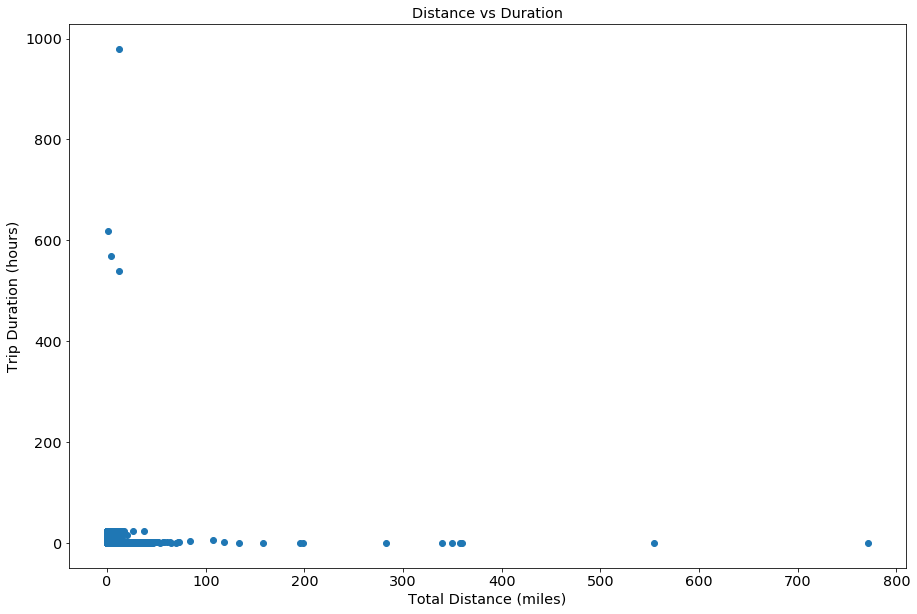

In [16]:
plt.scatter(df['total_distance'], df['trip_duration_hours'])
plt.xlabel("Total Distance (miles)")
plt.ylabel("Trip Duration (hours)")
plt.title('Distance vs Duration')

Some anomalies are arise with a quick glance at the graph. It is not possible to have a taxi trip of more than 100 miles in less than one hour and also a trip that lasts more than 500 hours for less than 50 miles. Since we have a large dataset, removing these points will not make an impact. Let's assume the points are errors in the data and create a graph excluding the points. 

Text(0.5,1,'Distance vs Duration')

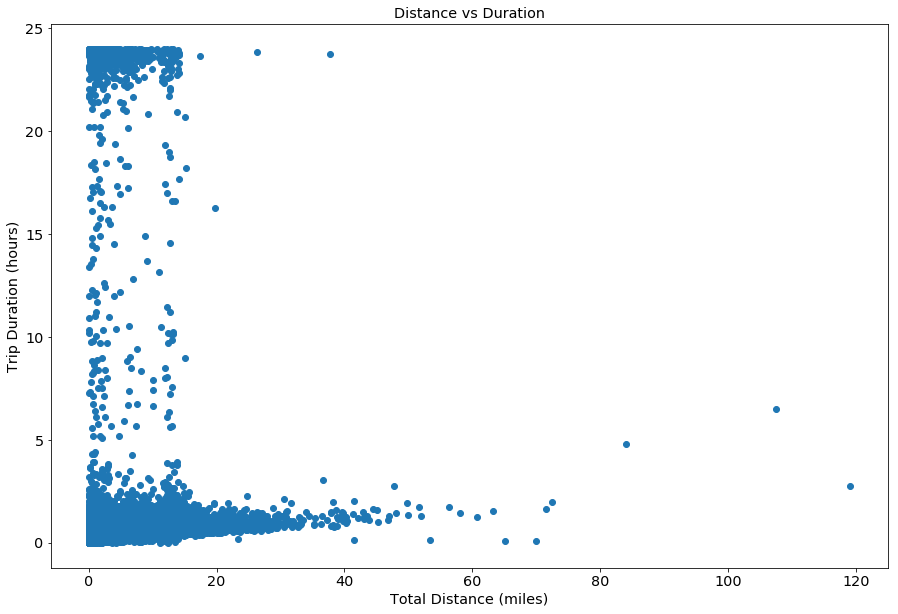

In [17]:
plt.scatter(df[(df['trip_duration_hours'] < 100) & (df['total_distance']<125)]['total_distance'], df[(df['trip_duration_hours'] < 100) & (df['total_distance']<125)]['trip_duration_hours'])
plt.xlabel("Total Distance (miles)")
plt.ylabel("Trip Duration (hours)")
plt.title('Distance vs Duration')

After zooming in the data and removing some of the errors in the data, it is clear that there are more data points that look suspicious. 

Add mph column to make a better prediction of what could be an error in the data??? 

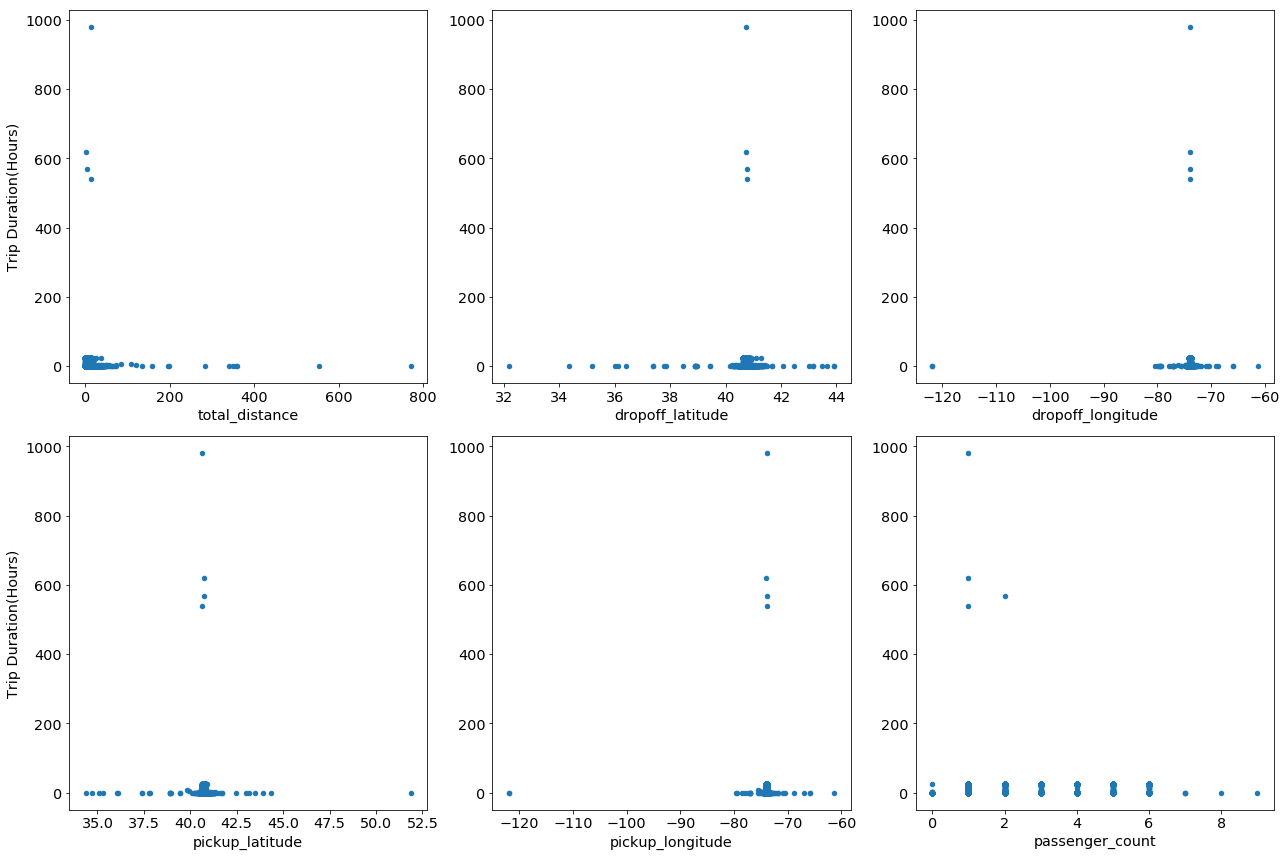

In [18]:
cols = ['total_distance','dropoff_latitude','dropoff_longitude','pickup_latitude',
       'pickup_longitude','passenger_count'] # should I add vendor_id?
r = 2
c = 3
fig, ax1 = plt.subplots(r, c, figsize=(18,12))

for i in np.arange(r):
    for j in np.arange(c):
        cid = j + (i*c)
        ax1[i,j].scatter(df[cols[cid]], df['trip_duration_hours'], s=20)
        ax1[i,j].set_xlabel(cols[cid])
        if j==0:
            ax1[i,j].set_ylabel("Trip Duration(Hours)")
plt.tight_layout()

## Modeling
***
Have not cleaned the data yet

In [19]:
md = ols('trip_duration_hours ~ total_distance + dropoff_latitude + dropoff_longitude + pickup_latitude + pickup_longitude + passenger_count + vendor_id', df).fit()
print(md.summary())

                             OLS Regression Results                            
Dep. Variable:     trip_duration_hours   R-squared:                       0.009
Model:                             OLS   Adj. R-squared:                  0.009
Method:                  Least Squares   F-statistic:                     1995.
Date:                 Sun, 25 Feb 2018   Prob (F-statistic):               0.00
Time:                         10:23:09   Log-Likelihood:            -2.6096e+06
No. Observations:              1458644   AIC:                         5.219e+06
Df Residuals:                  1458636   BIC:                         5.219e+06
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            27.8189

Text(0,0.5,'Residuals')

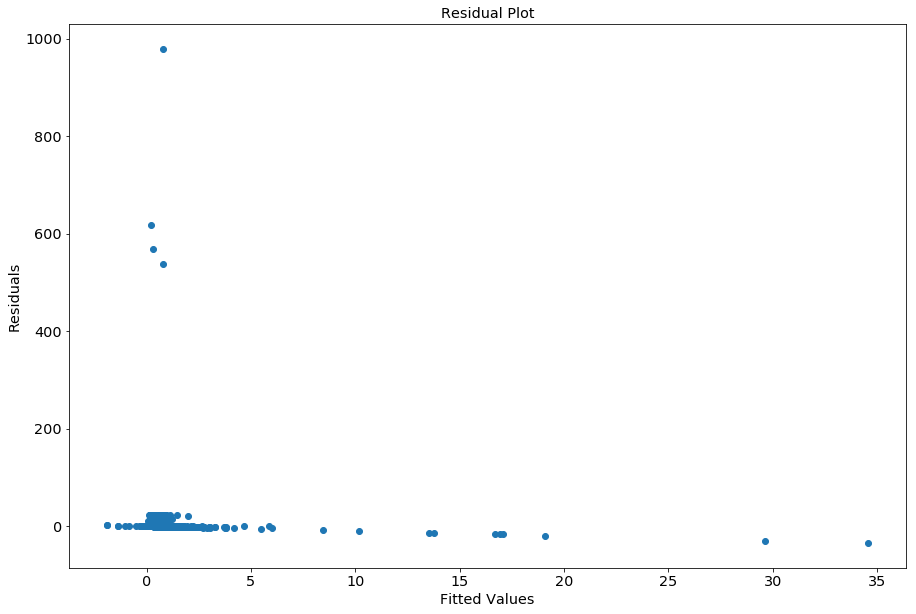

In [20]:
plt.scatter(x=md.fittedvalues, y=df['trip_duration_hours'] - md.fittedvalues)
plt.title("Residual Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

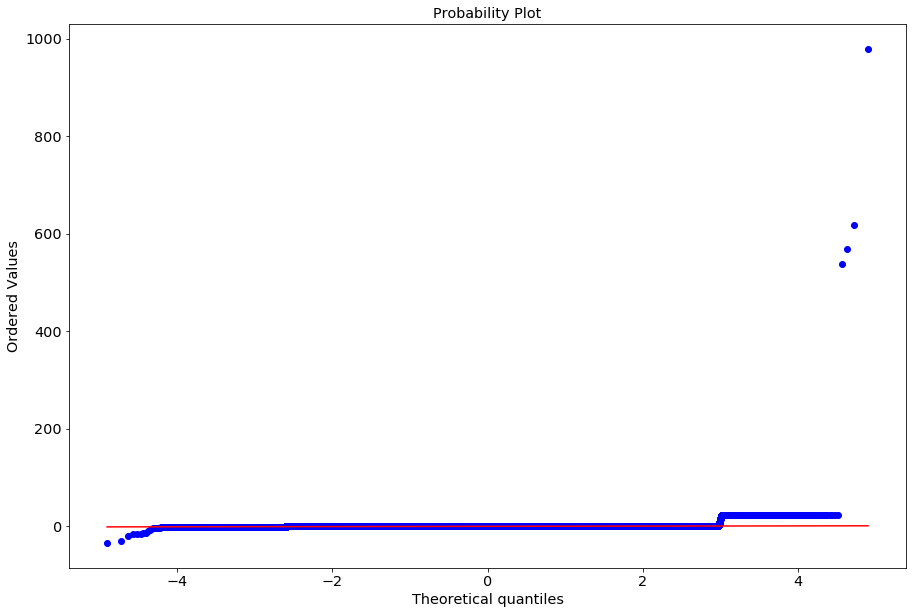

In [21]:
qp = probplot(df['trip_duration_hours'] - md.fittedvalues, plot=plt)

In [ ]:
# influence = md.get_influence()
# #c is the distance and p is p-value
# (c, p) = influence.cooks_distance
# plt.stem(np.arange(len(c)), c, markerfmt=",")

In [ ]:
# l1 = plot_leverage_resid2(md)

In [ ]:
# i1 = influence_plot(md)